# L1.4 Selección de características

En esta lectura realizaremos métodos de selección de características: selección hacia adelante, eliminación hacia atrás, y Lasso.

Por favor no modifiques las celdas con las instrucciones, y solamente escribe código en las celdas donde así se te indica. **Si en algún momento seleccionas por error una celda de instrucciones y su apariencia cambia, simplemente presiona "Ctrl + Enter".**

Dentro de las celdas de código, las líneas que inician con un "\#" son comentarios y no se ejecutarán, simplemente sirven como instrucciones o descripciones útiles para ustedes.

Una vez más trabajaremos con los datos del Wine Quality Data Set, generados por Paulo Cortez y un grupo de investigación de la University of Minho, en Portugal, disponibles en [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality). Como ya lo sabes, los investigadores utilizaron estos datos para tratar de modelar las preferencias de consumo de vino, generando un índice de calidad. Nosotros ya usamos la información disponible en el módulo anterior para predecir dicho índice. Ahora, trataremos de mejorar la precisión del modelo a través de metodologías de selección de características. Puedes encontrar la base de datos junto con el material del curso; el archivo lleva por nombre "L1.4 Vino Tinto.csv".

En la primera celda cargaremos la base de datos en una variable de nombre `df` usando la función `read_csv`de la librería de pandas, revisaremos el tamaño de la base de datos con la función `shape` y revisaremos los nombres de las variables con el operador `columns`. No olvides asegurarte de que el archivo a leer esté en el mismo directorio donde se encuentra esta libreta.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import pandas as pd<br>
    df = pd.read_csv("Vino Tinto.csv")<br>
    print(df.shape)<br>
    print(df.columns)
</details>

In [2]:
# Importa la librería pandas
import pandas as pd
# Lee el archivo
df = pd.read_csv("L1.4 Vino Tinto.csv")
# Imprime en consola las dimensiones de los datos
print(df.shape)
# Imprime en consola los nombres de las variables
print(df.columns)

(1599, 12)
Index(['acidezFija', 'acidezVolatil', 'acidoCitrico', 'azucarResidual',
       'cloruros', 'dioxidoAzufreLibre', 'dioxidoAzufreTotal', 'densidad',
       'pH', 'sulfatos', 'alcohol', 'calidad'],
      dtype='object')


Realizaremos algunos pasos que ya se realizaron en la lectura del módulo anterior, desde la separación en subconjuntos de entenamiento y prueba, hasta la creación de un modelo de regresión múltiple que incluya todas las variables del sistema. Si tienes alguna duda sobre cómo realizar estos pasos, te invito a que revises con detalle la lectura interactiva anterior.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.model_selection import train_test_split<br>
    train, test = train_test_split(df, train_size = 0.8)<br>
    import statsmodels.api as sm<br>
    X = train.drop('calidad', axis = 1)<br>
    Y = train.calidad<br>
    model = sm.OLS(Y,sm.add_constant(X))<br>
    results = model.fit()<br>
    print(results.summary())
</details>


In [16]:
# Importa la función train_test_split de la librería skleanr.model_selection
from sklearn.model_selection import train_test_split
# Genera los datos de entrenamiento (80%) y validación (20%)
train, test = train_test_split(df, train_size = 0.8)
# Importar librería statsmodels.api
import statsmodels.api as sm
# Generar elemento X
X = train.drop('calidad', axis = 1)
# Generar elemento Y
Y = train.calidad
# Definir el tipo de modelo
model = sm.OLS(Y,sm.add_constant(X))
# Ajustar el modelo para obtener resultados
results = model.fit()
# Imprimir un resumen de los resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                calidad   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     69.96
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          2.68e-122
Time:                        08:10:03   Log-Likelihood:                -1246.9
No. Observations:                1279   AIC:                             2518.
Df Residuals:                    1267   BIC:                             2580.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 29.4612     23

Hasta este punto debimos haber obtenido resultados muy similares a los obtenidos en la lectura interactiva anterior (las diferencias son causadas por la separación aleatoria de datos en los subconjuntos de entrenamiento y prueba). El modelo tiene una R cuadrada ajustada baja (probablemente ligeramente menor a 0.4), y múltiples variables tienen un *p-value* mayor a 0.05.

Es momento de iniciar con la selección de características. En este caso, trabajaremos con la selección hacia adelante rápida. Como probablemente recuerdes, el primer paso en esta metodología consiste en genear un *ranking* de las variables. En esta ocasión utilizaremos la correlación de Pearson para generar dicho ranking, métrica que puede calcularse usando la función `pearsonr` de la librería scipy.stats. Dicha función entrega tanto el valor de correlación, como su *p-value* asociado. Ya que de momento solo nos interesa la correlación, únicamente almacenaremos el primer valor (índice 0) entregado por la función. Adicionalmente, ya que solo nos interesa la magnitud de la correlación, y no su dirección, trabajaremos con el valor absoluto de la métrica, apoyándonos con la función `abs`.

En la siguiente celda, primero importaremos la función necesaria, después generarmos una variable de nombre `n` donde se almacene la cantidad de variables por analizar, y después inicializaremos un vector de zeros, usando la función `zeros` de numpy, donde eventualmente se guardarán los datos de correlación.

Para poder realizar la prueba de correlación entre cada columna de X e Y, utilizaremos un ciclo for (la indentación de la línea posterior al for es de suma importancia). Allí se realizará la prueba entre la primera columna de X e Y y se almacenará el valor en la primera posición del vector previamente inicializado. Después se realizará el mismo proceso entre la segunda columna de X e Y, después entre la tercera columna de X e Y, y así sucesivamente hasta analizar todas las variables. Finalmente, imprimiremos en consola los resultados.
<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from scipy.stats import pearsonr<br>
    import numpy as np<br>
    n = X.shape[1]<br>
    cor = np.zeros(n)<br>
    for i in range(n):<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cor[i] = abs(pearsonr(X.iloc[:, i], Y)[0])<br>
    print(cor)
</details>

In [17]:
# Importa la función pearsonr
from scipy.stats import pearsonr
# Importa numpy
import numpy as np
#Determina la cantidad de variables
n = X.shape[1]
# Inicializa el vector de correlaciones
cor = np.zeros(n)
# Realiza la comparación entre Y y cada columna de X
for i in range(n):
      cor[i] = abs(pearsonr(X.iloc[:, i], Y)[0])
# Imprime el resultado
print(cor)

[0.11901146 0.40487607 0.23440581 0.0250073  0.12402239 0.05488181
 0.17591782 0.1785821  0.0512614  0.26891235 0.4937687 ]


Una vez que conocemos la correlación que cada variable de entrada tiene con la variable de salida, podemos clasificarlas de mayor a menor, para entonces empezar a generar modelos. En la siguiente celda, almacenaremos dicho orden en una variable de nombre `ind`. Para lograrlo, nos ayudaremos de la función `argsort` de numpy, y ya que nos interesa que el orden sea de mayor a menor, pero la función genera el orden contrario, le entregaremos a la función como parámetro los valores negativos de correlación.

Solamente por curiosidad, también aprovecharemos para revisar el nombre de dichas variables, y así saber cómo se empezará a construir nuestro modelo. Para lograrlo, simplemente imprimiremos en pantalla los nombres de las columnas de X, pero en el orden indicado por el arreglo `ind`, esto con ayuda de la función `columns` de pandas.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    ind = np.argsort(-cor)<br>
    print(df.columns[ind])
</details>

In [18]:
# Almacena el orden de las variables
ind = np.argsort(-cor)
# Imprime los nombres de las variables en el orden del ranking
print(df.columns[ind])

Index(['alcohol', 'acidezVolatil', 'sulfatos', 'acidoCitrico', 'densidad',
       'dioxidoAzufreTotal', 'cloruros', 'acidezFija', 'dioxidoAzufreLibre',
       'pH', 'azucarResidual'],
      dtype='object')


Probablemente tus resultados indiquen la variable de mayor interés es el nivel de alcohol (podría haber variaciones dependiendo de la partición original de datos), seguido de la acidez volátil, hasta eventualmente llegar al azucar residual. Ahora sí, podremos empezar a generar modelos y revisar sus desempeños, medidos en término de la R cuadrada ajustada. Primero generaremos un modelo de regresión lineal simple que solamente incluya la mejor variable, después un modelo de regresión lineal múltiple que incluya las mejores dos variables, después uno con las tres mejores variables, y así sucesivamente hasta terminar con un modelo que incluya todas las variables del sistema.

Para lograrlo, primero inicializaremos un arreglo de nombre `Radj`, donde se irá almacenando la métrica de desempeño de cada modelo. Después declararemos un bucle `for` que recorrerá todas las variables de X. Dentro de dicho bucle, primero definiremos una X temporal con el nombre `Xtemp`, que incluirá solamente las variables de interés de la iteración correspondiente (desde 0 hasta *i*). Después generaremos y ajustaremos un modelo de regresión lineal múltiple en una sola línea de código (basándonos en las instrucciones que hemos usado previamente). La última tarea dentro del bucle consistirá en calcular y almacenar la R cuadrada ajustada; dicha tarea la resolveremos con la función `rsquared_adj` de la librería statsmodels, la misma de la que deriva la función `OLS` que usaremos para ajustar el modelo. Por lo mismo, primero tendremos que importar dicha librería. Finalmente, y para revisar los resultados, imprimiremos en pantalla el contenido del arreglo `Radj`.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import statsmodels.api as sm<br>
    Radj=np.zeros(len(ind))<br>
    for i in range(len(ind)):<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Xtemp=X.iloc[:,ind[0:i]]<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;modelTemp=sm.OLS(Y,sm.add_constant(Xtemp)).fit()<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Radj[i]=modelTemp.rsquared_adj<br>
    print(Radj)
</details>

In [19]:
# Importar la librería
import statsmodels.api as sm
# Inicializar el arreglo Radj
Radj=np.zeros(len(ind))
# Bucle for en el que se creará Xtemp, se entrenará el modelo, y se evaluará y almacenará Radj
for i in range(len(ind)):
      Xtemp=X.iloc[:,ind[0:i]]
      modelTemp=sm.OLS(Y,sm.add_constant(Xtemp)).fit()
      Radj[i]=modelTemp.rsquared_adj
# Imprimir resultados
print(Radj)

[4.44089210e-16 2.43215362e-01 3.38290905e-01 3.57966677e-01
 3.57940253e-01 3.57656743e-01 3.62791709e-01 3.68075531e-01
 3.70642535e-01 3.70853320e-01 3.72309329e-01]


Una vez que conocemos dichos resultados, podemos tomar la decisión de qué variables seleccionar para nuestro modelo. Sin embargo, en ocasiones resulta más sencillo tomar esa decisión después de visualizar los resultados en una gráfica.

En la siguiente celda, genera una gráfica para la variable `Radj`, definiendo como segundo parámetro el término `o-`, que provocará que cada valor se grafique como un pequeño punto, y que cada punto esté unido por una línea. La gráfica se generará con la función `plot` de la librería matplotlib.pyplot, así que no olvides primero importar dicha librería.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import matplotlib.pyplot as plt<br>
    plt.plot(Radj,'o-')
</details>

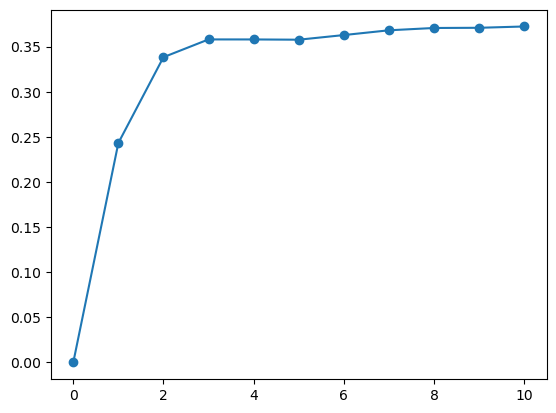

In [20]:
# Importa la librería
import matplotlib.pyplot as plt
# Genera la gráfica
plt.plot(Radj,'o-')

Sin duda hay muchas cosas que podríamos agregar y modificar a la gráfica para que se vea mejor y su significado sea más claro. Pero, ya que de momento solo la estamos creando para nuestros propios ojos, no necesitamos más que la visualización más básica.

A partir de dicha gráfica, en mi caso, podría considerar que las primeras 6 variables serían las adecuadas para seleccionar en mi modelo. Dependiendo de la separación inicial de datos, en tu caso, la imagen podría indicar algo distinto. Por simple conveniencia y para estandarizar nuestros resultados, asumamos que tomamos la decisión de seleccionar solamente las 6 variables mejor clasificadas.

A partir de este punto podríamos decir que ya realizamos una selección de características y terminar el ejercicio. Sin embargo, revisemo ahora la metodología de eliminación hacia atrás a partir de estos resultados. Es decir, veamos si podemos deshacernos de uno o varias de estas 6 variables, sin perjudicar el desempeño del modelo.

Generemos entonces 6 modelos de regresión múltiple, cada uno con 5 variables. Primero definiremos un *data frame* de nombre `Xfs` (X después de realizar *forward selection*) que contenga solamente las variables de interés, e inicializaremos una vez más un arreglo de nombre `RadjBE` (Radj después de realizar *backwards elimination*) donde se almacenará el desempeño de cada modelo.

Posteriormente, crearemos un bucle *for* con una estructura similar al utilizado en la etapa de selección hacia adelante. Primero se definirá `Xtemp` como la X temporal que constará de una columna menos que XFS, después se creará y entrenará el modelo, y por último se calculará y almacenará la métrica de desempeño. Una vez terminado este proceso, imprimiremos en consola los resultados de cada uno de estos modelos, así como el desempeño del modelo original (el que incluía las 6 variables, recordando que en Python el primer elemento tiene índice 0).

Trataré de dejar un poco más claro el proceso con el que crearemos `Xtemp`. Usaremos la función `drop` de pandas para eliminar la *i* columna, definiendo como parámetros `labels` y `axis`. Para el primero, especificaremos el nombre de la columna *i* usando la función `columns`, y para el segundo, simplemente lo definiremos como `1`.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    Xfs=X.iloc[:,ind[:6]]<br>
    RadjBE=np.zeros(6)<br>
    for i in range(len(RadjBE)):<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Xtemp=Xfs.drop(labels = Xfs.columns[i], axis = 1)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;modelTemp=sm.OLS(Y,sm.add_constant(Xtemp)).fit()<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;RadjBE[i]=modelTemp.rsquared_adj<br>
    print(RadjBE)<br>
    print(Radj[5])
</details>

In [21]:
# Genera el data frame Xfs con solo la información de las 6 mejores variables
Xfs=X.iloc[:,ind[:6]]
# Inicializa RadjBE
RadjBE=np.zeros(6)
# Bucle for en el que se creará Xtemp, se entrenará el modelo, y se evaluará y almacenará RadjBE
for i in range(len(RadjBE)):
      Xtemp=Xfs.drop(labels = Xfs.columns[i], axis = 1)
      modelTemp=sm.OLS(Y,sm.add_constant(Xtemp)).fit()
      RadjBE[i]=modelTemp.rsquared_adj
# Imprime los resultados
print(RadjBE)
# Imprime el resultado del modelo con las 6 mejores variables
print(Radj[5])

[0.2566666  0.31346739 0.34229937 0.36303159 0.36324735 0.35765674]
0.35765674330809183


Al revisar los resultados, en mi caso, se aprecia que el modelo que no incluye la quinta variable tiene el mejor desempeño de entre los 6 modelos de cinco variables, y que, además, tiene un mejor desempeño que el modelo con 6 variables. Por lo tanto, podemos eliminar dicha variable de nuestro modelo. Incluso si en tus resultados hay diferencias, una vez más, en aras de estandarizar nuestro trabajo, tomemos la decisión de eliminar la quinta variable.

Podríamos, y deberíamos, repetir este proceso, para así tratar de reducir el modelo tanto como sea posible. Sin embargo, de momento dejemos el ejercicio hasta ese punto. Ahora podríamos realizar el mismo proceso que generamos en la lectura interactiva previa y encontrar el RSE y R cuadrada de este modelo en los datos de prueba.

Para finalizar, simplemente quiero mostrarles una implementación exageradamente sencilla del método Lasso. Usando la función `Lasso` de la librería sklearn.linear_model, no necesitamos más que definir el valor de lambda (aquí llamado alpha), y entregarle a la función los datos. En la siguiente celda importa la función, crea el modelo con un lambda de 0.1, entrénalo con la función `fit`, e imprime el valor de los coeficientes estimados con la función `coef_`.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.linear_model import Lasso<br>
    modelL=Lasso(alpha=0.1)<br>
    modelL.fit(X,Y)<br>
    print(modelL.coef_)
</details>

In [23]:
# Importa la librería
from sklearn.linear_model import Lasso
# Crea el modelo
modelL=Lasso(alpha=0.1)
# Entrena el modelo
modelL.fit(X,Y)
# Imprime el valor de los coeficientes
print(modelL.coef_)

[ 0.02751269 -0.          0.          0.         -0.          0.00389581
 -0.00316165 -0.         -0.          0.          0.27463404]


Como podrás observar, muchos de los coeficientes tienen valor 0, indicando que el método de Lasso realizó una selección de características inherente. Con estas 4 líneas de código podemos llegar a reemplazar todo el trabajo que habíamos generado previamente. Pero, si nos interesa el proceso de selección hacia adelante y eliminación hacia atrás, también podemos apoyarnos en funciones para realizar el proceso de forma extremadamente sencilla y veloz. Por ejemplo, la función `SequentialFeatureSelector` de la librería sklearn.feature_selection puede generar tanto la selección hacia adelante como la eliminación hacia atrás con tan pocas líneas de código como el proceso de Lasso que acabamos de ejecutar.

Con esto finalizamos la lectura interactiva, hasta la próxima.